# Importing useful libraries

In [ ]:
import numpy as np
import pandas as pd 
from pandas import Series, DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the dataset.
The dataset can be found [here](https://github.com/shreedharmalpani/Intro-To-ML-Hello-FOSS/blob/main/iris.csv)

In [ ]:
df = pd.read_csv("iris.csv")

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Data Cleaning & Data Visualization

### 1) Remove unneeded columns
### 2) Check for duplicate rows 
### 2) Check for rows with missing values


In [ ]:
df.isna().sum()

In [ ]:
df.isnull()

### EDA (Exploratory Data Analysis) with Iris

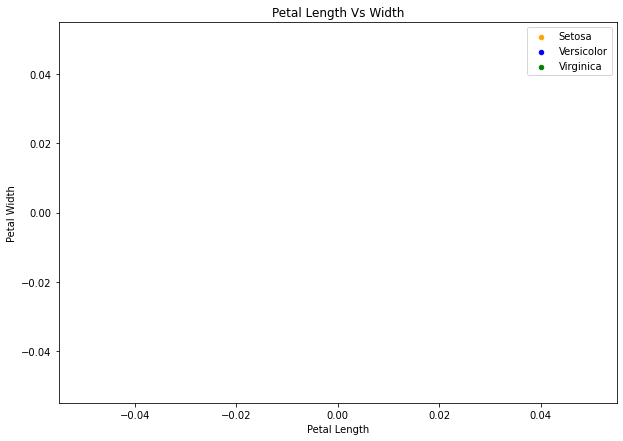

In [ ]:
##Displaying a scatter plot to show the distribution of Sepal Length vs width the dataset

fig = df[df.species == 'Iris-setosa'].plot(kind='scatter', x='petal_length', y='petal_width', color='orange', label='Setosa')
df[df.species == 'Iris-versicolor'].plot(kind='scatter', x='petal_length', y='petal_width', color='blue', label='Versicolor', ax=fig)
df[df.species == 'Iris-virginica'].plot(kind='scatter', x='petal_length', y='petal_width', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

In [ ]:
#Display a scatter plot to show the distribution of Sepal Length vs width the dataset (Like previous Petal lenght vs width scatter plot)


#code

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length Vs Width')


fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()
#example plot

AttributeError: ignored

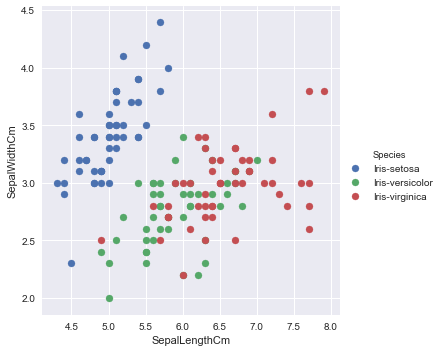

In [ ]:
#plot the FacetGrid plot using the seaborn library

#sns.FacetGrid(...)\
#   .map(...)\
#   .add_legend()


In [48]:
#Plot the distritbution of the features using histgram
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

<Figure size 864x432 with 0 Axes>

## Importing alll the necessary packages to use the various classification algorithms


In [ ]:
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn import svm # for suport vector machine algorithm
from sklearn import metrics # for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier # for using DTA

In [ ]:
df.shape

Now, when we train any algorithm, the number of features and their correlation plays an important role. If there are features and many of the features are highly correlated, then training an algorithm with all the featues will reduce the accuracy. Thus features selection should be done carefully. This dataset has less featues but still we will see the correlation.


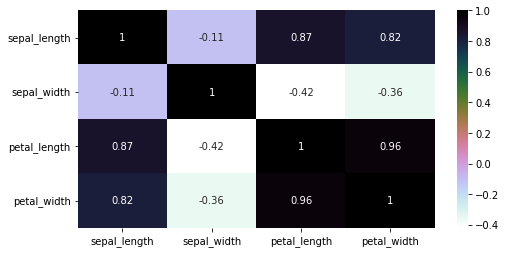

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(), annot=True, cmap='cubehelix_r') # draws heatmap with input as correlation matrix calculated by df.corr() 
plt.show()

Observation--->
The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated
We will use all the features for training the algorithm and check the accuracy.

Then we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm as we are using only 2 features that are not correlated. Thus we can have a variance in the dataset which may help in better accuracy. We will check it later.

Steps To Be followed When Applying an Algorithm

Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it will help in training the model better.

Select any algorithm based on the problem (classification or regression) whatever you feel may be good.
Then pass the training dataset to the algorithm to train it. We use the .fit() method
Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method.
We then check the accuracy by passing the predicted outcome and the actual output to the model.

# Splitting The Data into Training And Testing Dataset

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3) # our main data split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [ ]:
train_X = train[['sepal_length','sepal_width','petal_length','petal_width']] # taking the training data features
train_y = train.species # output of the training data

test_X = test[['sepal_length','sepal_width','petal_length','petal_width']] # taking test data feature
test_y = test.species # output value of the test data

In [ ]:
train_X.head()

,sepal_length,sepal_width,petal_length,petal_width
24,4.8,3.4,1.9,0.2
89,5.5,2.5,4.0,1.3
13,4.3,3.0,1.1,0.1
64,5.6,2.9,3.6,1.3
25,5.0,3.0,1.6,0.2


In [ ]:
test_X.head()

,sepal_length,sepal_width,petal_length,petal_width
3,4.6,3.1,1.5,0.2
45,4.8,3.0,1.4,0.3
140,6.7,3.1,5.6,2.4
46,5.1,3.8,1.6,0.2
53,5.5,2.3,4.0,1.3


In [ ]:
train_y.head()

24        setosa
89    versicolor
13        setosa
64    versicolor
25        setosa
Name: species, dtype: object

## Logistic Regression 

In [ ]:
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Logistic Regression is:  0.9777777777777777


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Support Vector Machine SVM

In [ ]:
clf = svm.SVC(kernel='linear')
clf.fit(train_X, train_y)

#Predict the response for test dataset
prediction = clf.predict(test_X)

print('The accuracy of Support Vector Machine is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Support Vector Machine is:  1.0


## Decision Tree

In [ ]:
#implementing using Decision Tree
#code

print('The accuracy of Decision Tree is: ', metrics.accuracy_score(prediction, test_y))

('The accuracy of Decision Tree is: ', 0.93333333333333335)


### We used all the features of iris in above models. Now we will use Petals and Sepals Seperately

### Creating Petals And Sepals Training Data

In [ ]:
petal = df[['PetalLengthCm','PetalWidthCm','Species']]
sepal = df[['SepalLengthCm','SepalWidthCm','Species']]

### For Iris Petal

In [ ]:
train_p,test_p = train_test_split(petal, test_size=0.3, random_state=0) #petals
train_x_p = train_p[['PetalWidthCm','PetalLengthCm']]  # taking the training data's Petal features
train_y_p = train_p.Species  # output of the  training data

test_x_p = test_p[['PetalWidthCm','PetalLengthCm']]   # taking the test data's Petal features
test_y_p = test_p.Species    # output of the test data

### For Iris Sepal

In [ ]:
#Similarly define the split for sepals
#define the training and test data's Sepal features followed by the output of the training and test data

#use naming- train_s,test_s ; train_x_s, train_y_s; test_x_s, test_y_s

#code

Implementing the algorithms just like we did on the complete dataset but separately on sepals and petals and calculating accuracy

## SVM Algorithm

In [ ]:
#code
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

#code
print('The accuracy of the SVM using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

## Logistic Regression

In [ ]:
#code
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

#code 
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

## Decision Tree

In [ ]:
#code
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

#code
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))




### Question:
Does Using Petals over Sepals for training the data give a much better accuracy? Why?
